In [5]:
import datasets

test = datasets.load_dataset("steamcyclone/Pill_Ideologies-Post_Titles", trust_remote_code=True)

Using the latest cached version of the module from C:\Users\ericr\.cache\huggingface\modules\datasets_modules\datasets\steamcyclone--Pill_Ideologies-Post_Titles\793a6b87307104ca492b65c5a82ea97d785585b22683f670e677e61876e2166c (last modified on Tue Mar 19 04:37:51 2024) since it couldn't be found locally at steamcyclone/Pill_Ideologies-Post_Titles, or remotely on the Hugging Face Hub.


In [13]:
import pandas as pd

In [16]:
test

DatasetDict({
    train: Dataset({
        features: ['subreddit', 'id', 'title', 'text', 'url', 'score', 'date', 'subreddit_subscribers', 'num_comments', 'ups', 'downs', 'upvote_ratio', 'is_video'],
        num_rows: 5123
    })
    validation: Dataset({
        features: ['subreddit', 'id', 'title', 'text', 'url', 'score', 'date', 'subreddit_subscribers', 'num_comments', 'ups', 'downs', 'upvote_ratio', 'is_video'],
        num_rows: 1281
    })
    test: Dataset({
        features: ['subreddit', 'id', 'title', 'text', 'url', 'score', 'date', 'subreddit_subscribers', 'num_comments', 'ups', 'downs', 'upvote_ratio', 'is_video'],
        num_rows: 712
    })
})

### Concatenate the Datasets

In [17]:
train = pd.DataFrame(test["train"])
validation = pd.DataFrame(test["validation"])
test = pd.DataFrame(test["test"])

In [18]:
# concatenate all the dataframes

df = pd.concat([train, validation, test])

In [20]:
df.shape == (len(train) + len(validation) + len(test), len(train.columns))

True

In [68]:
# preparing feature engineering by targetting mentions of words
gendered_words_men = ["boy", "boys", "man", "men", "guy", "guys", "he", "him", "his"]
gendered_words_father = ["father", "dad", "daddy"]
gendered_words_brother = ["brother", "brothers"]
gendered_words_son = ["son", "sons"]
gendered_words_uncle = ["uncle", "uncles"]
gendered_words_nephew = ["nephew", "nephews"]
gendered_words_husband = ["husband", "husbands", "spouse", "spouses"]
gendered_words_boyfriend = ["boyfriend", "boyfriends", "partner", "partners"]

gendered_words_women = [
    "women",
    "woman",
    "girl",
    "girls",
    "she",
    "her",
    "hers",
    "lady",
    "ladies",
]
gendered_words_mother = [
    "mother",
    "mothers",
    "mom",
    "moms",
    "mama",
    "mamas",
    "mum",
    "mommy",
    "mommies",
]
gendered_words_sister = ["sister", "sisters"]
gendered_words_daughter = ["daughter", "daughters"]
gendered_words_aunt = ["aunt", "aunts"]
gendered_words_niece = ["niece", "nieces"]
gendered_words_wife = ["wife", "wives", "spouse", "spouses"]
gendered_words_girlfriend = ["girlfriend", "girlfriends", "partner", "partners"]

# physical relations
sex_words = ["sex", "sexual", "sexual", "intercourse", "intimacy", "intimate"]
female_organs_words = ["breasts", "boobs", "vagina", "pussy", "vulva", "clitoris"]
male_organ_words = ["penis", "cock", "dick", "balls", "testicles"]
pregnancy_words = [
    "pregnancy",
    "pregnant",
    "conceive",
    "conception",
    "conceiving",
    "conceived",
    "miscarriage",
    "miscarry",
    "miscarried",
    "miscarrying",
    "abortion",
    "abort",
    "aborted",
    "aborting",
    "abortions",
]
menstrual_words = ["period", "menstruation", "menstrual", "cramps"]
love_words = [
    "love",
    "loves",
    "loved",
    "loving",
    "lover",
    "lovers",
    "lovable",
    "loveable",
    "lovingly",
    "unloved",
    "beloved",
    "loveless",
    "lovesick",
    "self-love",
]
romance_words = [
    'romance',
    "romantic",
    "romantically",
    "romanticism",
    "romanticist",
    "romanticize",
    "romanticized",
    "romanticizing",
    "romanticization",
    "romanticised",
    "romanticising",
    "romanticise",
]

self_words = [
    "i",
    "me",
    "my",
    "mine",
    "myself",
    "self",
    "mine"]

social_media_websites = [
    "facebook",
    "instagram",
    "twitter",
    "linkedIn",
    "snapchat",
    "tikTok",
    "pinterest",
    "reddit",
    "youTube",
    "whatsapp",
    "wechat",
    "telegram",
    "tumblr",
    "discord",
    "clubhouse",
    "twitch",
    "vine",
    "Myspace"
]

otherness = ['he', 'him', 'her', 'she', 'they', 'them', 'it', 'its', 'their', 'theirs']

togetherness = ['our', 'ours', 'us', 'we', 'ourselves']

negative_male = ["ass", "asshole", "jerk", "dick"]
negative_female = ["bitch", "whore", "whores", "hoe", "hoes"]


total_male_list = gendered_words_men + gendered_words_father + gendered_words_brother + gendered_words_son + gendered_words_uncle + gendered_words_nephew + gendered_words_husband + gendered_words_boyfriend + male_organ_words
total_female_list = gendered_words_women + gendered_words_mother + gendered_words_sister + gendered_words_daughter + gendered_words_aunt + gendered_words_niece + gendered_words_wife + menstrual_words + pregnancy_words + female_organs_words + gendered_words_girlfriend

In [70]:
df['title_processed'] = df['title'].str.lower()
df['title_processed'] = df['title_processed'].str.replace('[^\w\s]','')
df['title_split'] = df['title_processed'].str.split()
df['title_count'] = df['title_split'].apply(len)


df['text_processed'] = df['text'].str.lower()
df['text_processed'] = df['text_processed'].str.replace('[^\w\s]','')
df['text_split'] = df['text_processed'].str.split()
df['text_count'] = df['text_split'].apply(len)

# remove stopwords
stop = stopwords.words('english')
df['title_split'] = df['title_split'].apply(lambda x: [item for item in x if item not in stop])
df['text_split'] = df['text_split'].apply(lambda x: [item for item in x if item not in stop])


In [71]:
df['title_split'].head()

0                 [casual, sex, perceived, men, women]
1         [wrong, "settle", can't, get, really, want?]
2    [anyone, else, annoyed, seeing, valentines, po...
3                [60, dod, 2019, -, official, kickoff]
4                          [go, getting, relationship]
Name: title_split, dtype: object

In [72]:
df.head()

subreddit       id  \
0   PurplePillDebate  1bbj8lq   
1   PurplePillDebate  1aigdg6   
2  ForeverAloneWomen  1aqwejo   
3     marriedredpill   b45byj   
4  ForeverAloneWomen  18uwb2f   

                                               title  \
0      How casual sex is perceived for men and women   
1  Is it wrong to "settle" because you can't get ...   
2  Is anyone else annoyed by seeing all the valen...   
3                     60 DoD 2019 - Official kickoff   
4        How do I go about getting in a relationship   

                                                text url  score          date  \
0  In regards to the famous double standard (how ...          0  1.710100e+09   
1  I wanted to discuss this from the **male's per...         33  1.707024e+09   
2  I removed instagram and facebook from my phone...         54  1.707941e+09   
3  Rejoice, for 60 DoD 2019 is finally here! I kn...         60  1.553263e+09   
4  I 21 tried to date for years...and so far ive ...         24  1.703988e+09   

   subreddit_subscribers  num_comments  ups  ...  title_I_count  text_I_count  \
0                 127329           199    0  ...              0             0   
1                 127329           360   33  ...              0             0   
2                  22857             5   54  ...              0             3   
3                  50459            50   60  ...              0             0   
4                  22857            31   24  ...              0             3   

   title_i_count text_i_count title_facebook_count text_facebook_count  \
0              0            0                    0                   0   
1              0            0                    0                   0   
2              0            0                    0                   2   
3              0            0                    0                   0   
4              0            0                    0                   0   

   title_he_count text_he_count title_our_count  text_our_count  
0               0             0               0               0  
1               0             0               0               0  
2               0             0               0               0  
3               0             0               0               0  
4               0             0               0               0  

[5 rows x 76 columns]

In [73]:
def count_words(text_word_list, category_words):
    """To extract the count of specific categories in a text"""
    count = 0
    for word in text_word_list:
        if word in category_words:
            count += 1
    return count

In [74]:
# count the number of gendered words in the title

categories_list = [gendered_words_men, gendered_words_father, gendered_words_brother, gendered_words_son, gendered_words_uncle, gendered_words_nephew, gendered_words_husband, gendered_words_boyfriend,
                   gendered_words_women, gendered_words_mother, gendered_words_sister, gendered_words_daughter, gendered_words_aunt, gendered_words_niece, gendered_words_wife, gendered_words_girlfriend,
                   sex_words, female_organs_words, male_organ_words, pregnancy_words, menstrual_words, love_words, romance_words, self_words, social_media_websites, otherness, togetherness, total_female_list, total_male_list, negative_male, negative_female]

for category in categories_list:
    df["title_"+category[0]+"_count"] = df['title_split'].apply(count_words, category_words=category)
    df["text_"+category[0]+"_count"] = df['text_split'].apply(count_words, category_words=category)
    

In [75]:
df.head()

subreddit       id  \
0   PurplePillDebate  1bbj8lq   
1   PurplePillDebate  1aigdg6   
2  ForeverAloneWomen  1aqwejo   
3     marriedredpill   b45byj   
4  ForeverAloneWomen  18uwb2f   

                                               title  \
0      How casual sex is perceived for men and women   
1  Is it wrong to "settle" because you can't get ...   
2  Is anyone else annoyed by seeing all the valen...   
3                     60 DoD 2019 - Official kickoff   
4        How do I go about getting in a relationship   

                                                text url  score          date  \
0  In regards to the famous double standard (how ...          0  1.710100e+09   
1  I wanted to discuss this from the **male's per...         33  1.707024e+09   
2  I removed instagram and facebook from my phone...         54  1.707941e+09   
3  Rejoice, for 60 DoD 2019 is finally here! I kn...         60  1.553263e+09   
4  I 21 tried to date for years...and so far ive ...         24  1.703988e+09   

   subreddit_subscribers  num_comments  ups  ...  title_facebook_count  \
0                 127329           199    0  ...                     0   
1                 127329           360   33  ...                     0   
2                  22857             5   54  ...                     0   
3                  50459            50   60  ...                     0   
4                  22857            31   24  ...                     0   

   text_facebook_count  title_he_count text_he_count title_our_count  \
0                    0               0             0               0   
1                    0               0             0               0   
2                    2               0             0               0   
3                    0               0             0               0   
4                    0               0             0               0   

  text_our_count  title_ass_count text_ass_count title_bitch_count  \
0              0                0              0                 0   
1              0                0              0                 0   
2              0                0              0                 0   
3              0                0              0                 0   
4              0                0              0                 0   

   text_bitch_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 80 columns]

In [83]:
df['subreddit'].value_counts()

subreddit
TheBluePill           998
PurplePillDebate      952
RedPillWomen          931
RedPillWives          912
ForeverAloneWomen     886
marriedredpill        838
Feminism              831
askMRP                731
theredpillrebooted     37
Name: count, dtype: int64

In [84]:
# Categorize
df['subreddit_ideology'] = df['subreddit'].str.replace("marriedredpill", "RedPillMen")
# df['subreddit_ideology'] = df['subreddit_ideology'].str.replace("RedPillWives", "RedPillWomen")
df['subreddit_ideology'] = df['subreddit_ideology'].str.replace("askMRP", "RedPillMen")
df['subreddit_ideology'] = df['subreddit_ideology'].str.replace("theredpillrebooted", "RedPillMen")


In [85]:
df['subreddit_ideology'].value_counts()

subreddit_ideology
RedPillMen           1606
TheBluePill           998
PurplePillDebate      952
RedPillWomen          931
RedPillWives          912
ForeverAloneWomen     886
Feminism              831
Name: count, dtype: int64

In [126]:
df['subreddit'].value_counts().values

array([998, 952, 931, 912, 886, 838, 831, 731,  37], dtype=int64)

In [135]:
df['subreddit'].value_counts().index.values

array(['TheBluePill', 'PurplePillDebate', 'RedPillWomen', 'RedPillWives',
       'ForeverAloneWomen', 'marriedredpill', 'Feminism', 'askMRP',
       'theredpillrebooted'], dtype=object)

In [ ]:
plt.bar(df['subreddit'].value_counts().index.values, df['subreddit'].value_counts().values)

for index, value in enumerate(df['subreddit'].value_counts()):
    plt.text(value, index, str(int(value)))

plt.xlabel('Average word count')
plt.ylabel('Subreddit')
plt.title('Average word count per subreddit')
plt.suptitle('Red Pill Groups Have the Most to Say', fontsize=16, fontweight='bold', y = 1.02)
plt.show()

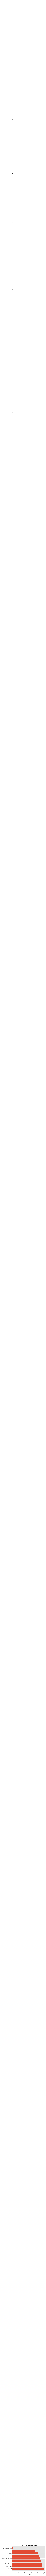

In [143]:
subreddit_vc = df['subreddit'].value_counts()

# Create vertical bar plot
plt.barh([name for name in subreddit_vc.index], [wc for wc in subreddit_vc.values])

# Add labels to each bar
for index, value in enumerate(subreddit_vc):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Subreddits')
plt.ylabel('Post Count')
plt.title('Blue Pill is the Subreddis')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

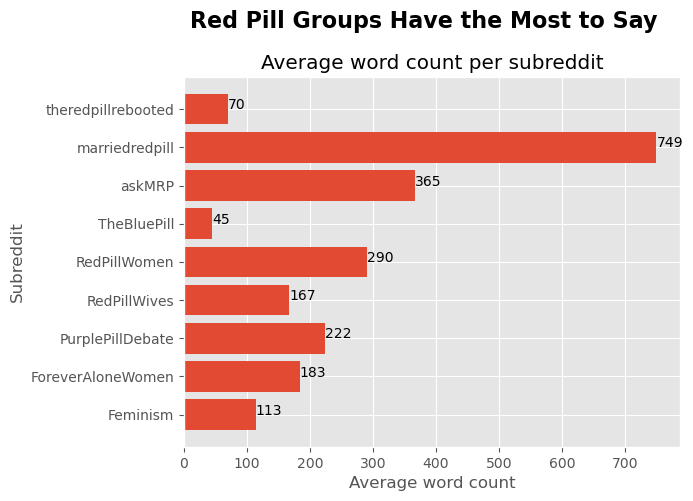

In [128]:

plt.barh(avg_wc_per_subreddit.index, avg_wc_per_subreddit.values)

for index, value in enumerate(avg_wc_per_subreddit):
    plt.text(value, index, str(int(value)))

plt.xlabel('Average word count')
plt.ylabel('Subreddit')
plt.title('Average word count per subreddit')
plt.suptitle('Red Pill Groups Have the Most to Say', fontsize=16, fontweight='bold', y = 1.02)
plt.show()

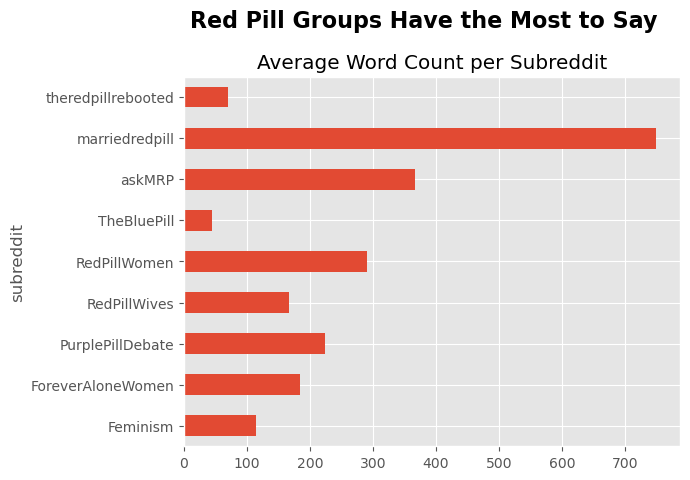

In [114]:
# make a barplot of the average word count per subreddit

import matplotlib.pyplot as plt

plt.style.use('ggplot')
avg_wc_per_subreddit = df.groupby('subreddit')['text_count'].mean()
avg_wc_per_subreddit.plot(kind='barh', title='Average Word Count per Subreddit', x='subreddit', y='text_count')
plt.suptitle('Red Pill Groups Have the Most to Say', fontsize=16, fontweight='bold', y = 1.02)
plt.show()
# add count to the barplot



<Axes: title={'center': 'Average Comment per Subreddit'}, ylabel='subreddit'>

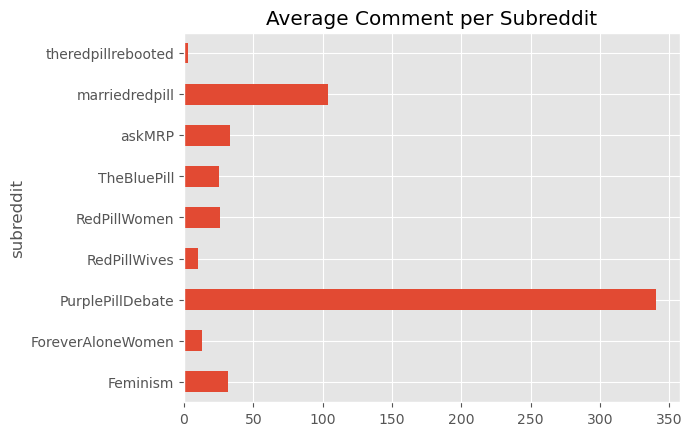

In [115]:
df.groupby('subreddit')['num_comments'].mean().plot(kind='barh', title='Average Comment per Subreddit', x='subreddit', y='text_count')